**3. Scenario Design:**
Identify and create distinct scenarios representing real-world situations. Consider datasets that
cover three issues from the following:
1. Imbalanced classes:

For this part I am using the Credit Card Fraud Detection dataset, which is the best/biggest dataset I could find for this, others were relatively small and comparing their metrics was unnoticed. The dataset can be found here:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

Unzipping the dataset.

In [5]:
!unzip archive.zip

Archive:  archive.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Loading the dataset csv file and noticing the head to get a better look into the data.

In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv("creditcard.csv")

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

df = pd.DataFrame(data=np.c_[X, y], columns=np.append(data.columns[:-1], 'target'))

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


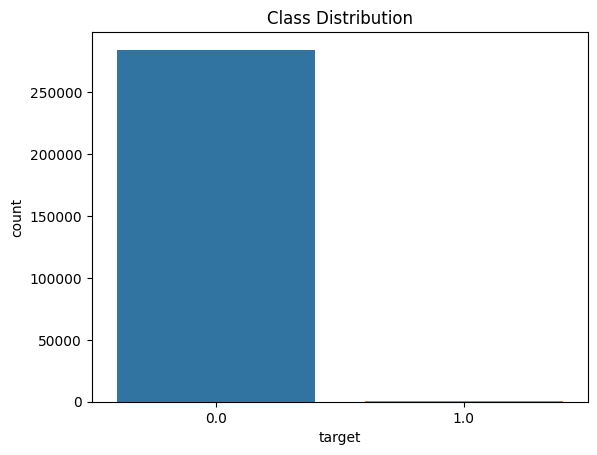

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We can notice in the plot above the difference between each class count, showing a big unbalanced classes in the dataset.

First lets train this dataset on random classifier.

We will try different hyperparameters for this, the default parameters are 100 for n-estimators, 'gini' for the criterion. As per https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


We will experiment on multiple hyperparmeters, a combination of three estimators [50, 100, 150], and both the criterions gini and entropy for each one of the estimators.

In [9]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def train_and_evaluate_rf(X_train, y_train, X_test, y_test, n_estimators=100, criterion='gini'):
    print(f"\nRandom Forest Hyperparameters: n_estimators={n_estimators}, criterion={criterion}")

    start_time = time.time()

    rf_classifier = RandomForestClassifier(random_state=42, n_estimators=n_estimators, criterion=criterion)
    rf_classifier.fit(X_train, y_train)

    end_time = time.time()
    training_time = end_time - start_time

    rf_predictions = rf_classifier.predict(X_test)
    rf_roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

    print(f"Training Time: {training_time:.2f} seconds")
    print("Random Forest Metrics:")
    print(classification_report(y_test, rf_predictions))
    print(f"AUC-ROC: {rf_roc_auc}\n")

    return {
        'n_estimators': n_estimators,
        'criterion': criterion,
        'training_time': training_time,
        'roc_auc': rf_roc_auc
    }

In [20]:
rf_results_list = []
for n_estimators in [50, 100, 150]:
    for criterion in ['gini', 'entropy']:
        result = train_and_evaluate_rf(X_train, y_train, X_test, y_test,
                                       n_estimators=n_estimators,
                                       criterion=criterion)
        rf_results_list.append(result)


Random Forest Hyperparameters: n_estimators=50, criterion=gini
Training Time: 153.68 seconds
Random Forest Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC: 0.9480902518576366


Random Forest Hyperparameters: n_estimators=50, criterion=entropy
Training Time: 97.00 seconds
Random Forest Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC: 0.9584413006902253


Random Forest Hyperparameters: n_estimators=100, cr

To better visualize this, I plotted the ROC scores for each different combination of hyperparameters.

In [10]:
def plot_rf_results(results_list):
    plt.figure(figsize=(12, 8))

    results_list.sort(key=lambda x: x['n_estimators'])
    for criterion in ['gini', 'entropy']:
        filtered_results = [result for result in results_list if result['criterion'] == criterion]
        n_estimators_values = [result['n_estimators'] for result in filtered_results]
        auc_roc_values = [result['roc_auc'] for result in filtered_results]

        plt.plot(n_estimators_values, auc_roc_values, marker='o', label=f"criterion={criterion}")

    plt.xlabel('n_estimators')
    plt.ylabel('AUC-ROC')
    plt.title('AUC-ROC for Random Forest with Different Hyperparameters')
    plt.legend()
    plt.show()

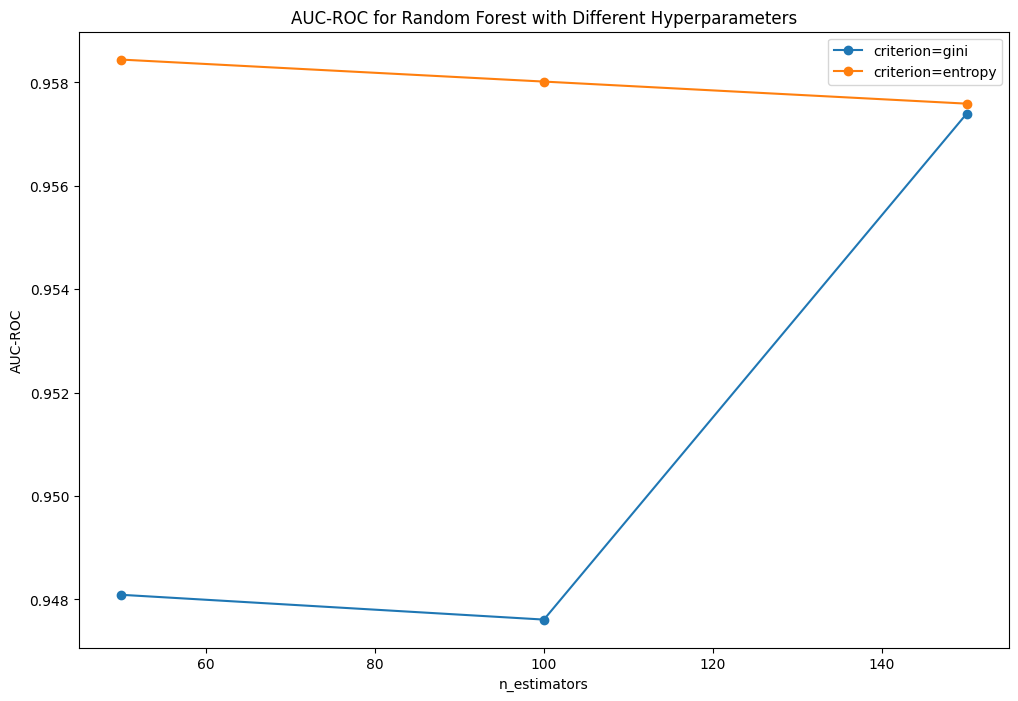

In [21]:
plot_rf_results(rf_results_list)

Now experimenting on the XGBoost in the same way, using three estimators [50, 100, 150] and three different learning rates [0.01, 0.1, 0.2]

In [11]:
import time
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

def train_and_evaluate_xgb(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1):
    print(f"\nXGBoost Hyperparameters: n_estimators={n_estimators}, learning_rate={learning_rate}")

    start_time = time.time()

    xgb_classifier = XGBClassifier(random_state=42, n_estimators=n_estimators, learning_rate=learning_rate)
    xgb_classifier.fit(X_train, y_train)

    end_time = time.time()
    training_time = end_time - start_time

    xgb_predictions = xgb_classifier.predict(X_test)
    xgb_roc_auc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])

    print(f"Training Time: {training_time:.2f} seconds")
    print("XGBoost Metrics:")
    print(classification_report(y_test, xgb_predictions))
    print(f"AUC-ROC: {xgb_roc_auc}\n")

    return {
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'training_time': training_time,
        'roc_auc': xgb_roc_auc
    }

In [12]:
xgb_results_list = []
for n_estimators in [50, 100, 150]:
    for learning_rate in [0.01, 0.1, 0.2]:
        result = train_and_evaluate_xgb(X_train, y_train, X_test, y_test,
                                        n_estimators=n_estimators,
                                        learning_rate=learning_rate)
        xgb_results_list.append(result)


XGBoost Hyperparameters: n_estimators=50, learning_rate=0.01
Training Time: 8.96 seconds
XGBoost Metrics:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC: 0.9384312408840857


XGBoost Hyperparameters: n_estimators=50, learning_rate=0.1
Training Time: 2.75 seconds
XGBoost Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC: 0.9805707208319457


XGBoost Hyperparameters: n_estimators=50, learning_rate=0.2
Training Time: 2.86 seconds
XGBoost Metrics:
              precision    recall  f1-score   support

           0       1.

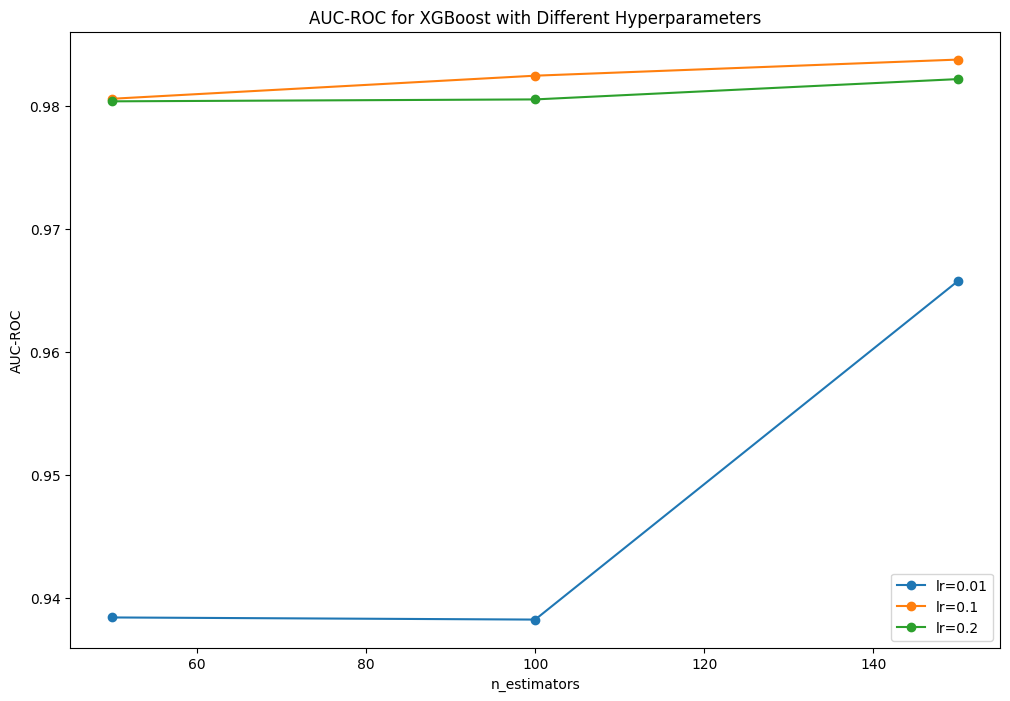

In [13]:
def plot_xgb_results(results_list):
    plt.figure(figsize=(12, 8))

    results_list.sort(key=lambda x: x['n_estimators'])

    for learning_rate in [0.01, 0.1, 0.2]:
        filtered_results = [result for result in results_list if result['learning_rate'] == learning_rate]
        n_estimators_values = [result['n_estimators'] for result in filtered_results]
        auc_roc_values = [result['roc_auc'] for result in filtered_results]

        plt.plot(n_estimators_values, auc_roc_values, marker='o', label=f"lr={learning_rate}")

    plt.xlabel('n_estimators')
    plt.ylabel('AUC-ROC')
    plt.title('AUC-ROC for XGBoost with Different Hyperparameters')
    plt.legend()
    plt.show()
plot_xgb_results(xgb_results_list)


2. Noisy data or features,


For this part I am using the breast_cancer dataset, I will introduce some noise into its classes, but beforehand I will try and evaluate on it before the noise to notice the difference before and after!

In [43]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X_bc = data.data
y_bc = data.target

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

In [48]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_classifier = XGBClassifier(random_state=42)

grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb,
                                scoring={'roc_auc': 'roc_auc',
                                         'precision': 'precision',
                                         'recall': 'recall',
                                         'f1': 'f1'},
                                cv=3, refit='roc_auc', verbose=1)

grid_search_xgb.fit(X_train_bc, y_train_bc)

best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters for XGBoost:", best_params_xgb)

best_xgb_classifier = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_classifier.predict(X_test_bc)

roc_auc_xgb = roc_auc_score(y_test_bc, best_xgb_classifier.predict_proba(X_test_bc)[:, 1])
precision_xgb = precision_score(y_test_bc, y_pred_xgb)
recall_xgb = recall_score(y_test_bc, y_pred_xgb)
f1_xgb = f1_score(y_test_bc, y_pred_xgb)

print(f"AUC-ROC on Test Set (XGBoost): {roc_auc_xgb}")
print(f"Precision on Test Set (XGBoost): {precision_xgb}")
print(f"Recall on Test Set (XGBoost): {recall_xgb}")
print(f"F1 Score on Test Set (XGBoost): {f1_xgb}")


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Hyperparameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 150}
AUC-ROC on Test Set (XGBoost): 0.9927939731411726
Precision on Test Set (XGBoost): 0.9583333333333334
Recall on Test Set (XGBoost): 0.971830985915493
F1 Score on Test Set (XGBoost): 0.965034965034965


Now trying it on the random forrest:

In [49]:
from sklearn.metrics import precision_score, recall_score

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf,
                              scoring={'roc_auc': 'roc_auc',
                                       'precision': 'precision',
                                       'recall': 'recall',
                                       'f1': 'f1'},
                              cv=3, refit='roc_auc', verbose=1)

grid_search_rf.fit(X_train_bc, y_train_bc)

best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

best_rf_classifier = grid_search_rf.best_estimator_
y_pred_rf = best_rf_classifier.predict(X_test_bc)

roc_auc_rf = roc_auc_score(y_test_bc, best_rf_classifier.predict_proba(X_test_bc)[:, 1])
precision_rf = precision_score(y_test_bc, y_pred_rf)
recall_rf = recall_score(y_test_bc, y_pred_rf)
f1_rf = f1_score(y_test_bc, y_pred_rf)

print(f"AUC-ROC on Test Set (Random Forest): {roc_auc_rf}")
print(f"Precision on Test Set (Random Forest): {precision_rf}")
print(f"Recall on Test Set (Random Forest): {recall_rf}")
print(f"F1 Score on Test Set (Random Forest): {f1_rf}")


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Hyperparameters for Random Forest: {'criterion': 'entropy', 'n_estimators': 150}
AUC-ROC on Test Set (Random Forest): 0.9983622666229938
Precision on Test Set (Random Forest): 0.958904109589041
Recall on Test Set (Random Forest): 0.9859154929577465
F1 Score on Test Set (Random Forest): 0.9722222222222222


In [14]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np

breast_cancer = load_breast_cancer()
original_data = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
original_data['target'] = breast_cancer.target

print("Original Breast Cancer Dataset:")
print(original_data.head())

noise_level = 0.1

noisy_data = original_data.copy()
for column in noisy_data.columns[:-1]:
    noise = np.random.normal(0, noise_level, size=len(noisy_data))
    noisy_data[column] = noisy_data[column] + noise

noise_percentage = 0.2
num_noise_samples = int(len(noisy_data) * noise_percentage)
noise_indices = np.random.choice(len(noisy_data), size=num_noise_samples, replace=False)
noisy_data.loc[noise_indices, 'target'] = 1 - noisy_data.loc[noise_indices, 'target']

print("\nNoisy Breast Cancer Dataset:")
print(noisy_data.head())

noisy_data.to_csv("noisy_breast_cancer.csv", index=False)

Original Breast Cancer Dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimet

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import time

noisy_data = pd.read_csv("noisy_breast_cancer.csv")

X = noisy_data.drop("target", axis=1)
y = noisy_data["target"]

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
rf_results_list2 = []
for n_estimators in [50, 100, 150]:
    for criterion in ['gini', 'entropy']:
        result = train_and_evaluate_rf(X_train_n, y_train_n, X_test_n, y_test_n,
                                       n_estimators=n_estimators,
                                       criterion=criterion)
        rf_results_list2.append(result)


Random Forest Hyperparameters: n_estimators=50, criterion=gini
Training Time: 0.17 seconds
Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.70      0.65      0.67        49
           1       0.75      0.78      0.77        65

    accuracy                           0.73       114
   macro avg       0.72      0.72      0.72       114
weighted avg       0.73      0.73      0.73       114

AUC-ROC: 0.7668759811616954


Random Forest Hyperparameters: n_estimators=50, criterion=entropy
Training Time: 0.18 seconds
Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67        49
           1       0.75      0.82      0.78        65

    accuracy                           0.74       114
   macro avg       0.73      0.72      0.73       114
weighted avg       0.74      0.74      0.73       114

AUC-ROC: 0.7612244897959184


Random Forest Hyperparameters: n_estimators=100, crite

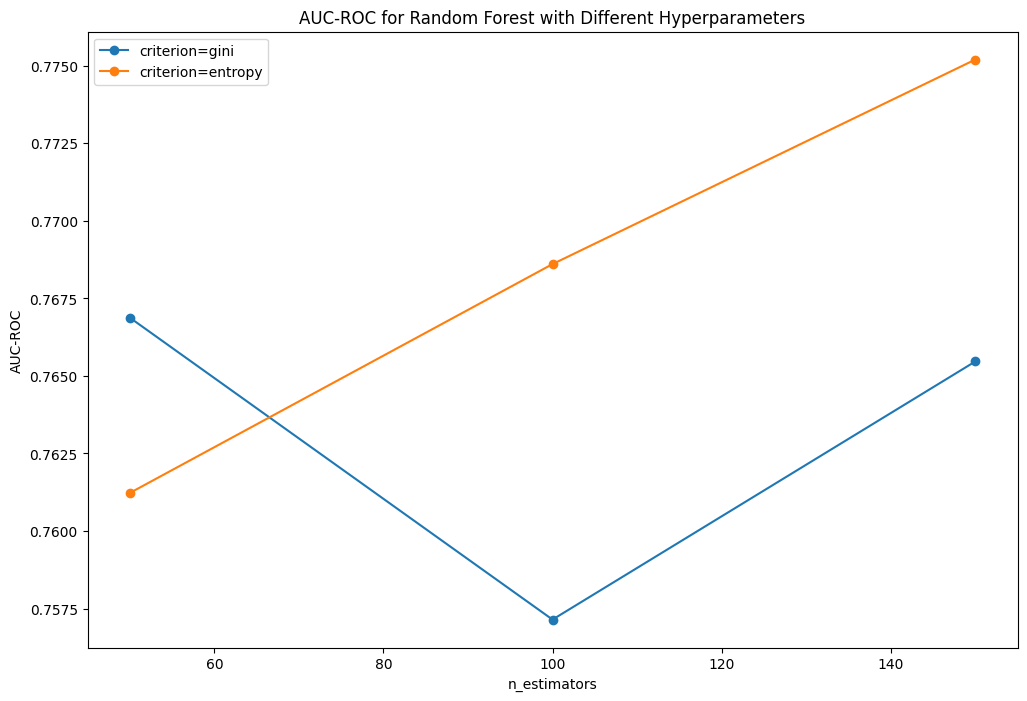

In [23]:
plot_rf_results(rf_results_list2)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf,
                              scoring={'roc_auc': 'roc_auc',
                                       'precision': 'precision',
                                       'recall': 'recall',
                                       'f1': 'f1'},
                              cv=3, refit='roc_auc', verbose=1)

grid_search_rf.fit(X_train_n, y_train_n)

best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

best_rf_classifier = grid_search_rf.best_estimator_
y_pred_rf2 = best_rf_classifier.predict(X_test_n)

roc_auc_rf = roc_auc_score(y_test_n, best_rf_classifier.predict_proba(X_test_n)[:, 1])
precision_rf = precision_score(y_test_n, y_pred_rf2)
recall_rf = recall_score(y_test_n, y_pred_rf2)
f1_rf = f1_score(y_test_n, y_pred_rf2)

print(f"AUC-ROC on Test Set (Random Forest): {roc_auc_rf}")
print(f"Precision on Test Set (Random Forest): {precision_rf}")
print(f"Recall on Test Set (Random Forest): {recall_rf}")
print(f"F1 Score on Test Set (Random Forest): {f1_rf}")


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Hyperparameters for Random Forest: {'criterion': 'gini', 'n_estimators': 100}
AUC-ROC on Test Set (Random Forest): 0.7571428571428571
Precision on Test Set (Random Forest): 0.7428571428571429
Recall on Test Set (Random Forest): 0.8
F1 Score on Test Set (Random Forest): 0.7703703703703704


XGBoost With NOISE:

In [20]:
xgb_results_list2 = []
for n_estimators in [50, 100, 150]:
    for learning_rate in [0.01, 0.1, 0.2]:
        result = train_and_evaluate_xgb(X_train_n, y_train_n, X_test_n, y_test_n,
                                        n_estimators=n_estimators,
                                        learning_rate=learning_rate)
        xgb_results_list2.append(result)


XGBoost Hyperparameters: n_estimators=50, learning_rate=0.01
Training Time: 2.24 seconds
XGBoost Metrics:
              precision    recall  f1-score   support

           0       0.75      0.55      0.64        49
           1       0.72      0.86      0.78        65

    accuracy                           0.73       114
   macro avg       0.73      0.71      0.71       114
weighted avg       0.73      0.73      0.72       114

AUC-ROC: 0.7502354788069074


XGBoost Hyperparameters: n_estimators=50, learning_rate=0.1
Training Time: 2.91 seconds
XGBoost Metrics:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67        49
           1       0.74      0.85      0.79        65

    accuracy                           0.75       114
   macro avg       0.75      0.73      0.73       114
weighted avg       0.75      0.75      0.74       114

AUC-ROC: 0.7497645211930927


XGBoost Hyperparameters: n_estimators=50, learning_rate=0.2
Training Time:

In [22]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_classifier = XGBClassifier(random_state=42)

grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb,
                                scoring={'roc_auc': 'roc_auc',
                                         'precision': 'precision',
                                         'recall': 'recall',
                                         'f1': 'f1'},
                                cv=3, refit='roc_auc', verbose=1)

grid_search_xgb.fit(X_train_n, y_train_n)

best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters for XGBoost:", best_params_xgb)

best_xgb_classifier = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_classifier.predict(X_test_n)

roc_auc_xgb = roc_auc_score(y_test_n, best_xgb_classifier.predict_proba(X_test_n)[:, 1])
precision_xgb = precision_score(y_test_n, y_pred_xgb)
recall_xgb = recall_score(y_test_n, y_pred_xgb)
f1_xgb = f1_score(y_test_n, y_pred_xgb)

print(f"AUC-ROC on Test Set (XGBoost): {roc_auc_xgb}")
print(f"Precision on Test Set (XGBoost): {precision_xgb}")
print(f"Recall on Test Set (XGBoost): {recall_xgb}")
print(f"F1 Score on Test Set (XGBoost): {f1_xgb}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Hyperparameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 100}
AUC-ROC on Test Set (XGBoost): 0.7623233908948195
Precision on Test Set (XGBoost): 0.7746478873239436
Recall on Test Set (XGBoost): 0.8461538461538461
F1 Score on Test Set (XGBoost): 0.8088235294117647


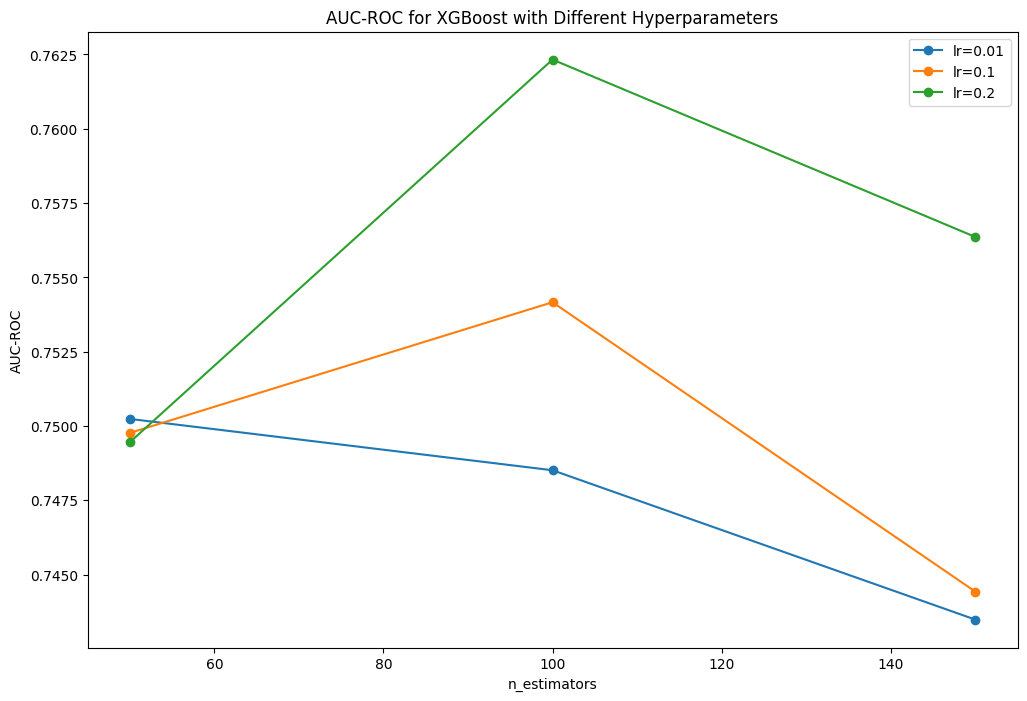

In [24]:
plot_xgb_results(xgb_results_list2)


3. Large Datasets


Here I am using the MNIST Fashion Dataset.

In [14]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

In [15]:
def train_and_evaluate_rf_mc(X_train, y_train, X_test, y_test, n_estimators=100, criterion='gini'):
    print(f"\nRandom Forest Hyperparameters: n_estimators={n_estimators}, criterion={criterion}")

    start_time = time.time()

    rf_classifier = RandomForestClassifier(random_state=42, n_estimators=n_estimators, criterion=criterion)
    rf_classifier.fit(X_train, y_train)

    end_time = time.time()
    training_time = end_time - start_time

    rf_predictions = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, rf_predictions)
    rf_roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test), multi_class='ovr')

    print(f"Training Time: {training_time:.2f} seconds")
    print("Random Forest Metrics:")
    print(classification_report(y_test, rf_predictions))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {rf_roc_auc}\n")

    return {
        'n_estimators': n_estimators,
        'criterion': criterion,
        'training_time': training_time,
        'roc_auc': rf_roc_auc,
        'accuracy': accuracy
    }

In [16]:
rf_results_list_mc = []

for n_estimators in [50, 100, 150]:
    for criterion in ['gini', 'entropy']:
        result = train_and_evaluate_rf_mc(X_train, y_train, X_test, y_test,
                                       n_estimators=n_estimators,
                                       criterion=criterion)
        rf_results_list_mc.append(result)


Random Forest Hyperparameters: n_estimators=50, criterion=gini
Training Time: 47.56 seconds
Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.81      0.78      1000
           3       0.88      0.90      0.89      1000
           4       0.77      0.80      0.78      1000
           5       0.97      0.96      0.97      1000
           6       0.71      0.58      0.64      1000
           7       0.92      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Accuracy: 0.8735
AUC-ROC: 0.9884632666666666


Random Forest Hyperparameters: n_estimators=50, criterion=entropy
Training Tim

Graphing the accuracy and the hyperparameters.

In [17]:
def plot_rf_results_mc(results_list):
    plt.figure(figsize=(12, 8))

    results_list.sort(key=lambda x: x['n_estimators'])
    for criterion in ['gini', 'entropy']:
        filtered_results = [result for result in results_list if result['criterion'] == criterion]
        n_estimators_values = [result['n_estimators'] for result in filtered_results]
        auc_roc_values = [result['accuracy'] for result in filtered_results]

        plt.plot(n_estimators_values, auc_roc_values, marker='o', label=f"criterion={criterion}")

    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

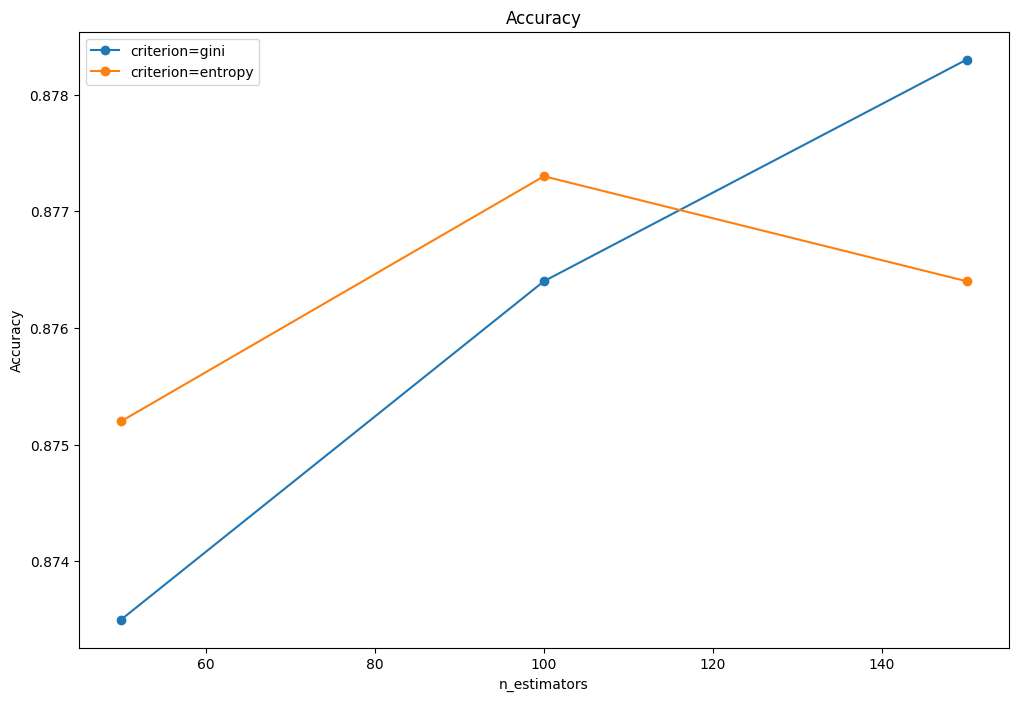

In [18]:
plot_rf_results_mc(rf_results_list_mc)

For the XGBoost part

In [19]:
def train_and_evaluate_xgb_mc(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1):
    print(f"\nXGBoost Hyperparameters: n_estimators={n_estimators}, learning_rate={learning_rate}")

    start_time = time.time()

    xgb_classifier = XGBClassifier(random_state=42, n_estimators=n_estimators, learning_rate=learning_rate)
    xgb_classifier.fit(X_train, y_train)

    end_time = time.time()
    training_time = end_time - start_time

    xgb_predictions = xgb_classifier.predict(X_test)
    xgb_roc_auc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test), multi_class='ovr')
    accuracy = accuracy_score(y_test, xgb_predictions)

    print(f"Training Time: {training_time:.2f} seconds")
    print("XGBoost Metrics:")
    print(classification_report(y_test, xgb_predictions))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {xgb_roc_auc}\n")

    return {
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'training_time': training_time,
        'roc_auc': xgb_roc_auc,
        'accuracy': accuracy
    }


In [21]:
xgb_results_list_mc = []
for n_estimators in [50, 100]:
    for learning_rate in [0.01, 0.1]:
        result = train_and_evaluate_xgb_mc(X_train, y_train, X_test, y_test,
                                        n_estimators=n_estimators,
                                        learning_rate=learning_rate)
        xgb_results_list_mc.append(result)


XGBoost Hyperparameters: n_estimators=50, learning_rate=0.01
Training Time: 266.21 seconds
XGBoost Metrics:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.99      0.94      0.96      1000
           2       0.70      0.76      0.73      1000
           3       0.78      0.89      0.83      1000
           4       0.70      0.75      0.73      1000
           5       0.97      0.91      0.94      1000
           6       0.67      0.50      0.57      1000
           7       0.89      0.93      0.91      1000
           8       0.95      0.92      0.94      1000
           9       0.90      0.94      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000

Accuracy: 0.8348
AUC-ROC: 0.9812714777777778


XGBoost Hyperparameters: n_estimators=50, learning_rate=0.1
Training Time: 271.09 sec

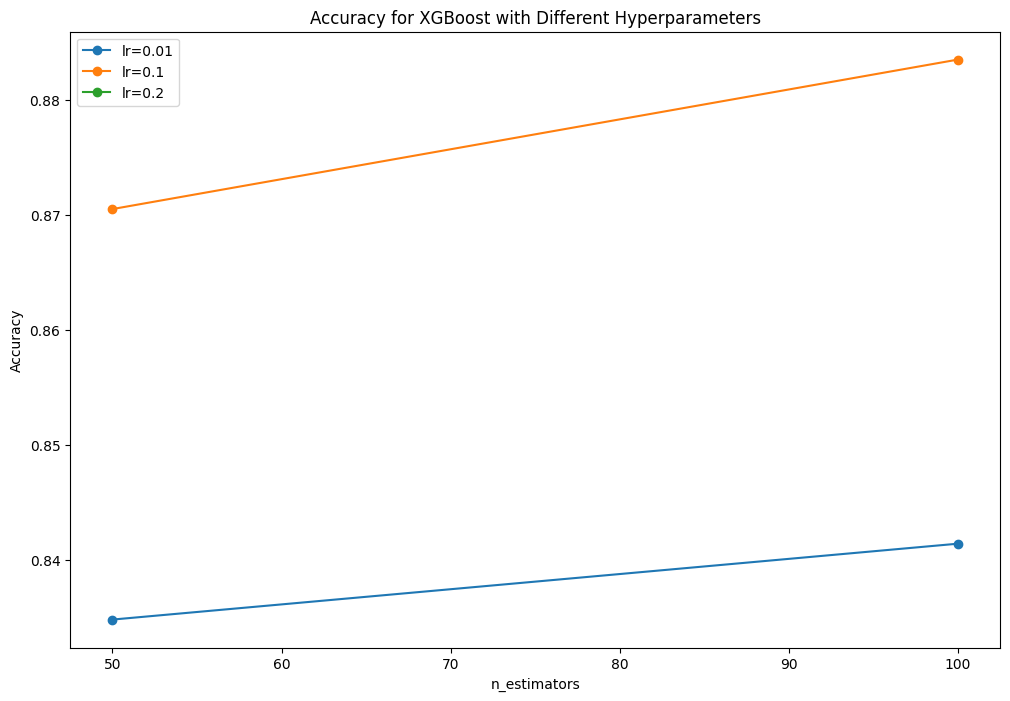

In [23]:
def plot_xgb_results_mc(results_list):
    plt.figure(figsize=(12, 8))

    results_list.sort(key=lambda x: x['n_estimators'])

    for learning_rate in [0.01, 0.1, 0.2]:
        filtered_results = [result for result in results_list if result['learning_rate'] == learning_rate]
        n_estimators_values = [result['n_estimators'] for result in filtered_results]
        auc_roc_values = [result['accuracy'] for result in filtered_results]

        plt.plot(n_estimators_values, auc_roc_values, marker='o', label=f"lr={learning_rate}")

    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for XGBoost with Different Hyperparameters')
    plt.legend()
    plt.show()
plot_xgb_results_mc(xgb_results_list_mc)


Trying with a learning rate of 0.2

In [24]:
train_and_evaluate_xgb_mc(X_train, y_train, X_test, y_test,
                                        n_estimators=100,
                                        learning_rate=0.2)


XGBoost Hyperparameters: n_estimators=100, learning_rate=0.2
Training Time: 502.75 seconds
XGBoost Metrics:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.80      0.83      0.81      1000
           3       0.90      0.92      0.91      1000
           4       0.81      0.82      0.82      1000
           5       0.99      0.97      0.98      1000
           6       0.72      0.67      0.69      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8942
AUC-ROC: 0.992124511111111



{'n_estimators': 100,
 'learning_rate': 0.2,
 'training_time': 502.7457332611084,
 'roc_auc': 0.992124511111111,
 'accuracy': 0.8942}